<h1>Predicting Cardiovascular Disease</h1>

<h3>01. Intro</h3>

I've always been interested in the use of machine learning to predict diseases. I found this cardiovascular disease dataset on Kaggle, which contains 70 000 records of patient data collected at the time of medical examination, consisting of 12 features. The target class "cardio" is 1 when cardiovascular disease is present and 0 when absent. The objective of this exercise is to predict the presence of cardivascular disease on new data. 

It's a clean dataset with clearly defined features, making it a great place to start an independent project in the life sciences domain and get my hands dirty in implementing some techniques I've been learning.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 63

In [3]:
dataset = pd.read_csv("cardio_train.csv", sep=";")

df = dataset

In [4]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


Looking at the dataset, the age entries look a little off - after checking to make sure that the dataset has loaded correctly, I refer to the feature dictionary and found that age is defined in days, which gives the variable more precision. 

| Feature | Variable      | Value Type |
|---------|---------------|------------|
| Age | age | int (days) |
| Height | height | int (cm) |
| Weight | weight | float (kg) |
| Gender | gender | categorical code |
| Systolic blood pressure | ap_hi | int |
| Diastolic blood pressure | ap_lo | int |
| Cholesterol | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | smoke | binary |
| Alcohol intake | alco | binary |
| Physical activity | active | binary |
| Presence or absence of cardiovascular disease | cardio | binary |


<h3>02. Data Cleaning and Exploration</h3>

First we need to make sure that there are no duplicates in the data. 

In [5]:
df.drop(columns="id", inplace=True)
print("Duplicated rows: ", df.duplicated().sum())
print("Total rows: ", df.shape[0])

Duplicated rows:  24
Total rows:  70000


In [6]:
df.drop_duplicates(inplace=True)
print("Duplicated rows: ", df.duplicated().sum())
print("Total rows: ", df.shape[0])

Duplicated rows:  0
Total rows:  69976


Next we need to understand missing data and treat them accordingly.

In [7]:
print("\nMissing Values :", df.isnull().sum())


Missing Values : age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


Surprisingly, there are no missing values, which is more reflective of the sample dataset than real world situations.

Next, we see that numerical columns such as height and weight are quite straightforward, but it's deceptive to leave them as they are. This is especially evident with other features such as the blood pressure, where the numbers are less familiar in terms of scale. Hence all these numerical columns need to be normalized to understand better their scale relative to the rest of the dataset. This is also important to allow certain algorithms to perform better.

In [8]:
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# scale each column accordingly
for var_col in numerical_columns:
    df[var_col + '_norm'] = df[var_col]/max(df[var_col])

df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_norm,height_norm,weight_norm,ap_hi_norm,ap_lo_norm
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.775650,0.672,0.310,0.006866,0.007273
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.853034,0.624,0.425,0.008739,0.008182
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.795218,0.660,0.320,0.008115,0.006364
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.743179,0.676,0.410,0.009363,0.009091
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.736895,0.624,0.280,0.006242,0.005455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,0.811369,0.672,0.380,0.007491,0.007273
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,0.953106,0.632,0.630,0.008739,0.008182
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,0.804032,0.732,0.525,0.011236,0.008182
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,0.945937,0.652,0.360,0.008427,0.007273


We can see how the normalized columns compare to the original columns.

Text(0.5, 1.0, 'Age (Years)')

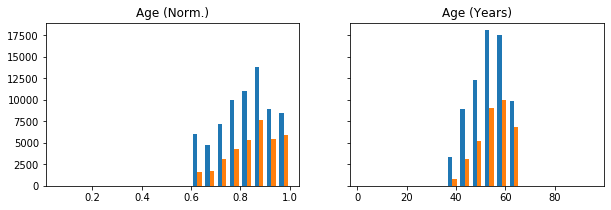

In [12]:
has_disease = df.loc[df["cardio"]==1]

age_target_norm = has_disease["age_norm"]
age_df_norm = df["age_norm"]
bins1 = [(x+1)/20 for x in range(20)]

age_target = has_disease["age"]/365
age_df = df["age"]/365
bins2 = [x for x in range(1,100,5)]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

ax1.hist([age_df_norm, age_target_norm.values], bins=bins1, rwidth=0.7)
ax1.set_title('Age (Norm.)')
ax2.hist([age_df, age_target.values], bins=bins2, rwidth=0.7)
ax2.set_title('Age (Years)')

In the normalized dataset, the distribution is more spread out and we can easily see that the dataset is skewed to the left. Knowing the distribution of the underlying sample is important in interpreting the results of the data exploration exercise as it allows us to compare the proportion of the sample that has cardiovascular disease vs misreporting overrepresented samples.

In [13]:
df["age_bins"] = pd.cut(df['age_norm'], bins=bins1)

# Proportion of dataset having cardiovascular disease, by age
prop_age_target = pd.DataFrame(df.groupby(["age_bins","cardio"])["cardio"].count().unstack().reset_index())
prop_age_target["Proportion"] = prop_age_target[1]/(prop_age_target[0] + prop_age_target[1])
prop_age_target.tail(10)

prop_age_target

cardio,age_bins,0,1,Proportion
0,"(0.05, 0.1]",0,0,NaN
1,"(0.1, 0.15]",0,0,NaN
2,"(0.15, 0.2]",0,0,NaN
3,"(0.2, 0.25]",0,0,NaN
4,"(0.25, 0.3]",0,0,NaN
5,"(0.3, 0.35]",0,0,NaN
6,"(0.35, 0.4]",0,0,NaN
7,"(0.4, 0.45]",0,0,NaN
8,"(0.45, 0.5]",4,0,0.000000
9,"(0.5, 0.55]",0,0,NaN


Here we see that the older populations have a higher risk of having a cardiovascular disease.

In [14]:
gender_target = has_disease["gender"].value_counts()
gender_df = df["gender"].value_counts()

print("Distribution of gender in sample")
print(gender_target)
print("")

print("Distribution of gender with cardiovascular disease")
print(gender_df)
print("")

print("% gender with cardiovascular disease")
print(gender_target.values/gender_df.values)

Distribution of gender in sample
1    22610
2    12362
Name: gender, dtype: int64

Distribution of gender with cardiovascular disease
1    45509
2    24467
Name: gender, dtype: int64

% gender with cardiovascular disease
[0.4968248  0.50525197]


Gender seems to matter less. We'll take a look at the rest of the numerical column to see that they make sense.

Text(0.5, 1.0, 'Diastolic blood pressure (Norm)')

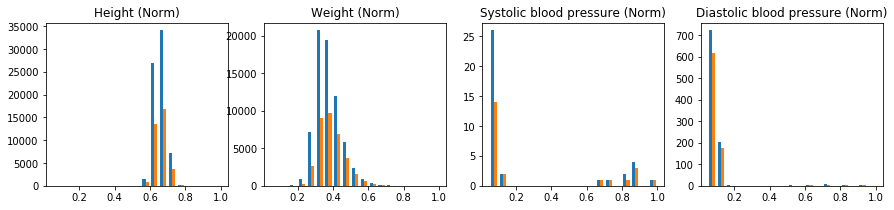

In [15]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))

ax1.hist([df["height_norm"], has_disease["height_norm"].values], bins=bins1, rwidth=0.7)
ax1.set_title('Height (Norm)')
ax2.hist([df["weight_norm"], has_disease["weight_norm"].values], bins=bins1, rwidth=0.7)
ax2.set_title('Weight (Norm)')
ax3.hist([df["ap_hi_norm"], has_disease["ap_hi_norm"].values], bins=bins1, rwidth=0.7)
ax3.set_title('Systolic blood pressure (Norm)')
ax4.hist([df["ap_lo_norm"], has_disease["ap_lo_norm"].values], bins=bins1, rwidth=0.7)
ax4.set_title('Diastolic blood pressure (Norm)')

The blood pressure features seem a bit off. It looks like there are some outliers in the data causing the data to normalize by a constant that doesn't make sense. 

In [16]:
print("Max of ap_lo: ", max(df["ap_lo"]))
print("Max of ap_hi: ", max(df["ap_hi"]))

print("95th quantile of ap_lo: ", df["ap_lo"].quantile(0.95))
print("95th quantile of ap_hi: ", df["ap_hi"].quantile(0.95))

Max of ap_lo:  11000
Max of ap_hi:  16020
95th quantile of ap_lo:  100.0
95th quantile of ap_hi:  160.0


We'll redo the normalization of these two columns, this time using the 95th quantile as the normalization constant rather than the max. In this step we'll also drop the rows with values above this quantile.

In [17]:
ap_lo_above_qnt = df["ap_lo"]>df["ap_lo"].quantile(0.95)
ap_hi_above_qnt = df["ap_hi"]>df["ap_hi"].quantile(0.95)

print("Total rows: ", df.shape[0])
print("Rows with outlier data: ", len(df[ap_lo_above_qnt|ap_hi_above_qnt].index))

df.drop(df[ap_lo_above_qnt|ap_hi_above_qnt].index, inplace=True)
print("Total rows: ", df.shape[0]) 


Total rows:  69976
Rows with outlier data:  3069
Total rows:  66907


In [18]:
for var_col in ["ap_lo","ap_hi"]:
    df[var_col + '_norm'] = df[var_col]/max(df[var_col])
    print(max(df[var_col]))

100
160


Text(0.5, 1.0, 'Diastolic blood pressure (Norm)')

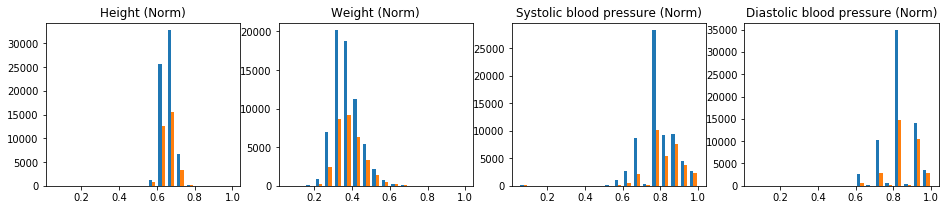

In [19]:
has_disease = df.loc[df["cardio"]==1]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3))

ax1.hist([df["height_norm"], has_disease["height_norm"].values], bins=bins1, rwidth=0.7)
ax1.set_title('Height (Norm)')
ax2.hist([df["weight_norm"], has_disease["weight_norm"].values], bins=bins1, rwidth=0.7)
ax2.set_title('Weight (Norm)')
ax3.hist([df["ap_hi_norm"], has_disease["ap_hi_norm"].values], bins=bins1, rwidth=0.7)
ax3.set_title('Systolic blood pressure (Norm)')
ax4.hist([df["ap_lo_norm"],has_disease["ap_lo_norm"].values], bins=bins1, rwidth=0.7)
ax4.set_title('Diastolic blood pressure (Norm)')

We can do a similar check for categorical data:

Text(0.5, 1.0, 'Active')

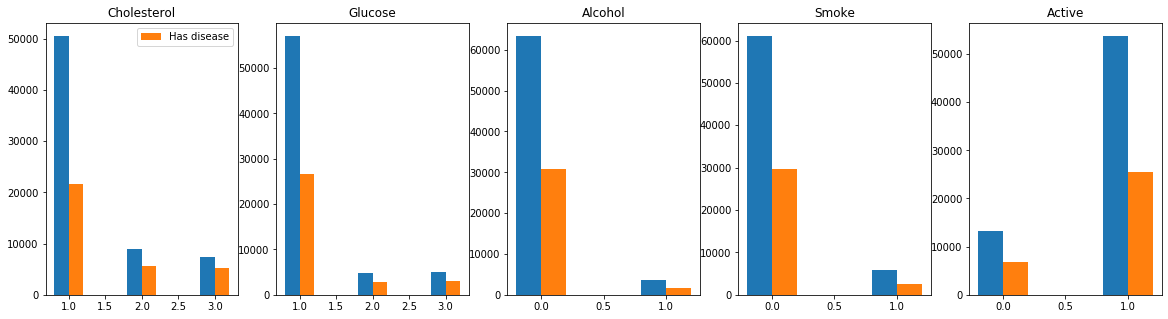

In [20]:
width=0.2
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(20, 5))

ax1.bar(x=df["cholesterol"].value_counts().index-0.1, height=df["cholesterol"].value_counts().values, width=width)
ax1.bar(x=df["cholesterol"].value_counts().index+0.1, height=has_disease["cholesterol"].value_counts().values, width=width, label="Has disease")
ax1.set_title('Cholesterol')
ax1.legend()

ax2.bar(x=df["gluc"].value_counts().index-0.1, height=df["gluc"].value_counts().values, width=width)
ax2.bar(x=df["gluc"].value_counts().index+0.1, height=has_disease["gluc"].value_counts().values, width=width)
ax2.set_title('Glucose')

ax3.bar(x=df["alco"].value_counts().index-0.1, height=df["alco"].value_counts().values, width=width)
ax3.bar(x=df["alco"].value_counts().index+0.1, height=has_disease["alco"].value_counts().values, width=width)
ax3.set_title('Alcohol')

ax4.bar(x=df["smoke"].value_counts().index-0.1, height=df["smoke"].value_counts().values, width=width)
ax4.bar(x=df["smoke"].value_counts().index+0.1, height=has_disease["smoke"].value_counts().values, width=width)
ax4.set_title('Smoke')

ax5.bar(x=df["active"].value_counts().index-0.1, height=df["active"].value_counts().values, width=width)
ax5.bar(x=df["active"].value_counts().index+0.1, height=has_disease["active"].value_counts().values, width=width)
ax5.set_title('Active')


As part of the data preparation step, we need to convert categorical variables into labels. Here I've opted for one-hot encoding as there are not too many of them. 

We encode them because the numerical values belonging to the categorical variables have no intrinsic numerical value, i.e. there is no sense of ordering. For example, the binary values [0,1] for the "Smoke" variable" only indicates presence. Even ordinal variables, such as "Cholesterol", which takes on the values 1: normal, 2: above normal, 3: well above normal, need to be encoded because those values do not have a mathematical scale.

In [22]:
print("No. of features: ", df.shape[1])

cat_columns = ["gender", "cholesterol","gluc","smoke","alco","active"]
data = pd.get_dummies(df, prefix_sep="_", columns=cat_columns, drop_first=True ) # drop first variable to avoid multicollinearity
print("No. of features after adding dummies: ", data.shape[1])

data.columns

No. of features:  18
No. of features after adding dummies:  20


Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio', 'age_norm',
       'height_norm', 'weight_norm', 'ap_hi_norm', 'ap_lo_norm', 'age_bins',
       'gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3',
       'smoke_1', 'alco_1', 'active_1'],
      dtype='object')

<h3>03. Splitting into training and validation sets</h3>

In [94]:
x = data[['age_norm',
       'height_norm', 'weight_norm', 'ap_hi_norm', 'ap_lo_norm',
       'gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3',
       'smoke_1', 'alco_1', 'active_1']]

y = data["cardio"]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.3)

print("Training size: ", X_train.shape[0])
print("Validation size: ", X_val.shape[0])

Training size:  46834
Validation size:  20073


From here on the validation set will be withheld completely until the end when we're ready to test our model. All parametric adjustments and decisions will be made entirely based on the training set only.

<h3>04. Feature Engineering</h3>

For the next part I'm interested in the features that have the most predictive value. While this dataset already presents the most relevant features (as a benchmark, a comparable heart disease dataset from the UCI Machine Learning Repository only uses 14 out of the 75 features collected), I'm curious to investigate the magnitude of importance of these features and if we can curate them better before feeding into the model. This step is important to:
- Avoid overfitting. While more features give more information for the model to learn from, the model might be too customized to the dataset and becomes unable to generalize  
- Improve dataset quality by avoiding feeding redundant or harmful information to the model
- Improve time and space efficiency


Feature engineering includes feature selection and feature extraction techniques:

**(A) Feature selection** refers to the subsetting of the features of a dataset by selecting the most relevant ones. This can be done through manual inspection or through feature selection algorithms. These algorithms are divided into three types: filter methods, wrapper methods, and embedded methods. 
- Filter methods essentially applies a statistical metric (chi-square, correlation) on the features and filter based on those metrics. 
- Wrapper methods are search algorithms for the most relevant features. For example, recursive backwards elimination recursively considers a smaller and smaller subset of features until a threshold is reached.
- Embedded methods function like mini machines that have their own algorithms for feature selection. Regularization and tree-based feature selections belong here.

**(B) Feature extraction** refers to dimension reduction techniques that involve mathematically summarizing a large number of features into a smaller, compact set of features. This is done through dimensionality reduction algorithms such as principal component analysis, linear discriminant analysis, or autoencoding (non-linear dimensionality reduction).

In [180]:
selected_features_list = [] # list to store the selected features from the different methods
selected_features_list.append(list(x.columns))

**(A.1) Feature Selection: Chi-square (filter method)**

I'm going to start with one of the simpler feature selection methods: a chi-square filter. The chi-square test essentially tests the relationships between categorical variables. It compares whether the presence of each variable affecting the target variable is a result of the variable's effect or pure chance. 

In [181]:
from sklearn.feature_selection import chi2
p_value_threshold = 0.01
chi_cat_columns = ['gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3',
       'smoke_1', 'alco_1', 'active_1']
chi_scores = chi2(X_train[chi_cat_columns], Y_train)

p_values = pd.DataFrame(chi_scores[1],index = [chi_cat_columns], columns=["p-values"])
p_values["below_threshold"] = p_values["p-values"]<p_value_threshold
p_values.sort_values(by="p-values")

,p-values,below_threshold
cholesterol_3,0.000000e+00,True
gluc_3,3.227325e-54,True
cholesterol_2,8.769251e-48,True
gluc_2,1.537341e-20,True
smoke_1,3.461858e-05,True
active_1,3.802735e-04,True
alco_1,3.602429e-02,False
gender_2,3.364201e-01,False


The chi-square reports the p-value for each variable, which is the probability that we observe the target variable if the null hypothesis (the variable has no effect) is correct. If the p-value is below the threshold (usually defined around levels of 0.05 or 0.01), we reject the null hypothesis and accept that the variable's effect is not due to chance. Here we see that the gender is at the bottom of the list - from our initial analysis earlier the gender distribution between absence and presence of disease is pretty balanced. 

One thing to remember is that this chi-square test considers the categorical variables in isolation from the rest of the features. When the other features are added, the importance may vary. Still, this gives us a starting point to confirm our initial hypotheses.

In [182]:
selected_features_pvalues = p_values.loc[p_values["below_threshold"]== True]["p-values"].reset_index().rename(columns={'level_0': 'features'})
selected_features_pvalues = list(selected_features_pvalues["features"])

selected_features_list.append(selected_features_pvalues)

**(A.2) Feature Selection: Recursive backwards elimination (wrapper method)**

This feature selection method starts with a model (we can specify what kind of model) and a desired number of features. The technique examines the p-values of the model at every iteration and removes the feature with the lowest p-value. It does this iteratively until the model is left with the desired number of features.

In [183]:
X_train_sample = X_train.sample(n=3000, random_state=random_state) # Use a smaller dataset 
Y_train_sample = Y_train.sample(n=3000, random_state=random_state)

In [184]:
num_feats = 10

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=num_feats, step=1)
selector = selector.fit(X_train_sample, Y_train_sample)

In [185]:
feats_recursive = pd.DataFrame({'Ranking': selector.ranking_,
                  'Selected': selector.support_,},
                  index=X_train_sample.columns).sort_values("Ranking")

feats_recursive

,Ranking,Selected
age_norm,1,True
height_norm,1,True
weight_norm,1,True
ap_hi_norm,1,True
ap_lo_norm,1,True
cholesterol_2,1,True
cholesterol_3,1,True
gluc_3,1,True
smoke_1,1,True
active_1,1,True


I've specified an arbitrary 10 as the number of features to select, but we can see again that gender is excluded from the shortlist of features.

In [186]:
selected_features_recursive = feats_recursive.loc[feats_recursive["Selected"]== True].reset_index().rename(columns={'index': 'features'})
selected_features_recursive = list(selected_features_recursive["features"])

selected_features_list.append(selected_features_recursive)

**(A.3) Feature Selection: Selection from Model (embedded method)**

Embedded methods start by training a machine learning model on all the features. They derive the feature importance of each feature. Tree-based algorithms are usually used as the base model for this method because tree-based algorithms ranks features by how well they improve the purity of the node. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node (equivalent to setting a threshold for the maximum number of features we want to consider), we can create a subset of the most important features.

In [187]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=50), max_features=num_feats)
rf_selector.fit(X_train_sample, Y_train_sample)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=None,
                                                 oob_score=False,


In [188]:
feats_selector = pd.DataFrame({'Selected': rf_selector.get_support()},
                              index=X_train_sample.columns)

feats_selector

,Selected
age_norm,True
height_norm,True
weight_norm,True
ap_hi_norm,True
ap_lo_norm,True
gender_2,False
cholesterol_2,False
cholesterol_3,False
gluc_2,False
gluc_3,False


<h3>05. Model Building</h3>

I want to start with a simple k-NN classifier and run it against all the three possible combinations of features selected based on the three methods.

In [189]:
selected_features_selector = feats_recursive.loc[feats_selector["Selected"]== True].reset_index().rename(columns={'index': 'features'})
selected_features_selector = list(selected_features_selector["features"])

selected_features_list.append(selected_features_selector)

selected_features_list

[['age_norm',
  'height_norm',
  'weight_norm',
  'ap_hi_norm',
  'ap_lo_norm',
  'gender_2',
  'cholesterol_2',
  'cholesterol_3',
  'gluc_2',
  'gluc_3',
  'smoke_1',
  'alco_1',
  'active_1'],
 ['cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3', 'smoke_1', 'active_1'],
 ['age_norm',
  'height_norm',
  'weight_norm',
  'ap_hi_norm',
  'ap_lo_norm',
  'cholesterol_2',
  'cholesterol_3',
  'gluc_3',
  'smoke_1',
  'active_1'],
 ['age_norm', 'height_norm', 'weight_norm', 'ap_hi_norm', 'ap_lo_norm']]

In [190]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

selected_features_method = ["All features", "Filter", "Wrapper", "Embedded"]
method_scores = []
for selected_features in selected_features_list:
    k = 20
    k_range = range(k)
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k+1)
        knn.fit(X_train[selected_features], Y_train)
        knn_predict = knn.predict(X_val[selected_features])
        scores.insert(k, metrics.accuracy_score(Y_val, knn_predict))
        
    method_scores.insert(selected_features_list.index(selected_features), scores)
    max_index = scores.index(max(scores)) + 1
    print(selected_features_method[selected_features_list.index(selected_features)], ":", max(scores), "with", max_index, "neighbors")

All features : 0.7170826483335824 with 20 neighbors
Filter : 0.5838190604294325 with 13 neighbors
Wrapper : 0.7193742838638968 with 20 neighbors
Embedded : 0.7075673790664077 with 20 neighbors


Text(0.5, 1.0, 'Embedded')

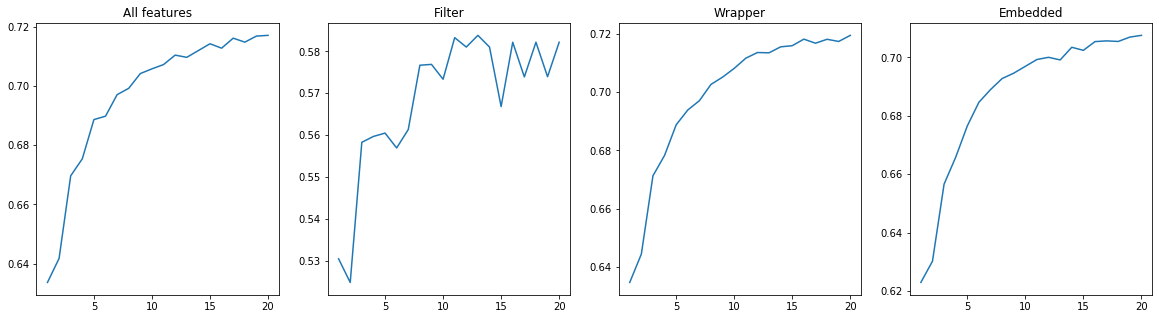

In [193]:
n = [n+1 for n in range(k+1)]

f2, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 5))

ax1.plot(n, method_scores[0])
ax1.set_title("All features")

ax2.plot(n, method_scores[1])
ax2.set_title("Filter")

ax3.plot(n, method_scores[2])
ax3.set_title("Wrapper")

ax4.plot(n, method_scores[3])
ax4.set_title("Embedded")


We see that the wrapper method, which selected the most relevant 10 features out of 13, outperforms using all the features, achieving a higher maximum accuracy than the latter. The embedded method comes a close second, which is impressive because it only needed half the number of features to get to a similar level of accuracy as the wrapper method.